## ***Trabajo Final Sistemas Inteligentes***

###*Integrantes*

*   Di Marco, Octavio
*   Giraudo, Tomás





##***Importamos los elementos, librerías y herramientas a utilizar***

In [2]:
import PIL
from PIL import Image
from scipy import io
import numpy as np
import cv2
import matplotlib as plt


import os
import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg

from keras.applications.resnet50 import ResNet50
from keras.datasets import cifar10
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import tensorflow as tf


from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

##***Importamos y descargamos los datos***

In [3]:
!wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=1x3s_EWykPtJwpaa26tvs6OCPWnejdAJ0" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p' > /tmp/confirm && wget --load-cookies /tmp/cookies.txt --no-check-certificate "https://docs.google.com/uc?export=download&confirm="$(cat /tmp/confirm)"&id=1x3s_EWykPtJwpaa26tvs6OCPWnejdAJ0" -O 'AllPhotos.zip' && rm /tmp/cookies.txt /tmp/confirm

--2020-06-18 12:05:33--  https://docs.google.com/uc?export=download&id=1x3s_EWykPtJwpaa26tvs6OCPWnejdAJ0
Resolving docs.google.com (docs.google.com)... 209.85.146.139, 209.85.146.100, 209.85.146.138, ...
Connecting to docs.google.com (docs.google.com)|209.85.146.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-06-18 12:05:33 (41.2 MB/s) - written to stdout [3246]

--2020-06-18 12:05:33--  https://docs.google.com/uc?export=download&confirm=JQK6&id=1x3s_EWykPtJwpaa26tvs6OCPWnejdAJ0
Resolving docs.google.com (docs.google.com)... 209.85.146.139, 209.85.146.100, 209.85.146.113, ...
Connecting to docs.google.com (docs.google.com)|209.85.146.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-38-docs.googleusercontent.com/docs/securesc/qffo1ji5bgq6b2a9behe6rbdhj0ci6j5/edjo14o7s9

In [4]:
!wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=1oWiL-r3L8sNhVU5WY7cjijdQ3Z_l2Owr" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p' > /tmp/confirm && wget --load-cookies /tmp/cookies.txt --no-check-certificate "https://docs.google.com/uc?export=download&confirm="$(cat /tmp/confirm)"&id=1oWiL-r3L8sNhVU5WY7cjijdQ3Z_l2Owr" -O 'data_annotations.csv' && rm /tmp/cookies.txt /tmp/confirm

--2020-06-18 12:07:48--  https://docs.google.com/uc?export=download&id=1oWiL-r3L8sNhVU5WY7cjijdQ3Z_l2Owr
Resolving docs.google.com (docs.google.com)... 209.85.146.101, 209.85.146.139, 209.85.146.102, ...
Connecting to docs.google.com (docs.google.com)|209.85.146.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kakg2rh7r02nhi6ebf39pq0to6vicppf/1592482050000/15871522452909708739/*/1oWiL-r3L8sNhVU5WY7cjijdQ3Z_l2Owr?e=download [following]
--2020-06-18 12:07:48--  https://doc-14-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kakg2rh7r02nhi6ebf39pq0to6vicppf/1592482050000/15871522452909708739/*/1oWiL-r3L8sNhVU5WY7cjijdQ3Z_l2Owr?e=download
Resolving doc-14-8o-docs.googleusercontent.com (doc-14-8o-docs.googleusercontent.com)... 173.194.197.132, 2607:f8b0:4001:c1b::84
Connecting to doc-14-8o-docs.googleusercontent.com (doc-14-8o-

In [5]:
!mkdir photos

In [6]:
!unzip './AllPhotos.zip' -d './photos'

Streaming output truncated to the last 5000 lines.
  inflating: ./photos/__MACOSX/All Photos/._601dd9c6-3544-4a3b-94b7-f9b77ae19451.png  
  inflating: ./photos/All Photos/f0ed5daf-f633-4f39-9369-3a59ff411927.png  
  inflating: ./photos/__MACOSX/All Photos/._f0ed5daf-f633-4f39-9369-3a59ff411927.png  
  inflating: ./photos/All Photos/1ac5f0e8-f431-4400-b3f5-4a2224e540b2.png  
  inflating: ./photos/__MACOSX/All Photos/._1ac5f0e8-f431-4400-b3f5-4a2224e540b2.png  
  inflating: ./photos/All Photos/c8b19efa-518a-4109-9aca-19272ed9c534.png  
  inflating: ./photos/__MACOSX/All Photos/._c8b19efa-518a-4109-9aca-19272ed9c534.png  
  inflating: ./photos/All Photos/a165e2bd-d4d8-4ccf-8e18-979fd4056c1a.png  
  inflating: ./photos/__MACOSX/All Photos/._a165e2bd-d4d8-4ccf-8e18-979fd4056c1a.png  
  inflating: ./photos/All Photos/f2a78be0-4397-4b01-8357-c2596406edd1.png  
  inflating: ./photos/__MACOSX/All Photos/._f2a78be0-4397-4b01-8357-c2596406edd1.png  
  inflating: ./photos/All Photos/8172b32c-460a-

# Funciones

In [7]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()

In [8]:
class MetricsHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.losses = []
    self.accuracie = []
    self.val_losses = []
    self.val_accuracies = []

  def on_epoch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))
    self.accuracie.append(logs.get('accuracy'))
    self.val_losses.append(logs.get('val_loss'))
    self.val_accuracies.append(logs.get('val_accuracy'))

metrics_history = MetricsHistory()

In [9]:
def get_classes_distribution(y_data):
    # Get the count for each label
    y = np.bincount(y_data)
    ii = np.nonzero(y)[0]
    label_counts = zip(ii, y[ii])

    # Get total number of samples
    total_samples = len(y_data)

    # Count the number of items in each class
    for label, count in label_counts:
        class_name = LABELS[label]
        percent = (count / total_samples) * 100
        print("{:<15s}:  {} or {:.2f}%".format(class_name, count, percent))
        
    return label_counts

#train_label_counts = get_classes_distribution(flatten_x)

In [10]:
LABELS = {'COVID-19' : "COVID", 'normal': "NORMAL", 'pneumonia': "NEUMONIA"}

def plot_label_per_class(y_data):
    
    classes = sorted(np.unique(y_data))
    f, ax = plt.subplots(1,1, figsize=(12, 4))
    g = sns.countplot(y_data, order=classes)
    g.set_title("Number of photos for each class")
    
    for p, label in zip(g.patches, classes):
        g.annotate(LABELS[label], (p.get_x(), p.get_height() + 0.2))
    
    plt.show()

#***Transformamos el CSV a un Pandas DataFrame***

In [11]:
import pandas
colnames = ['id', 'xcol', 'ycol', 'dataset']
data = pandas.read_csv('./data_annotations.csv', header=0, names=colnames)
data.head(10)

id                                               xcol       ycol dataset
0   3  SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....  pneumonia   cohen
1   3  SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....  pneumonia   cohen
2   3  SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...  pneumonia   cohen
3   7  SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...  pneumonia   cohen
4   7  SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...  pneumonia   cohen
5   9  SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...  pneumonia   cohen
6   9  SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...  pneumonia   cohen
7  10  SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...  pneumonia   cohen
8  10  SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...  pneumonia   cohen
9  10  SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...  pneumonia   cohen

### Distribucion de datos

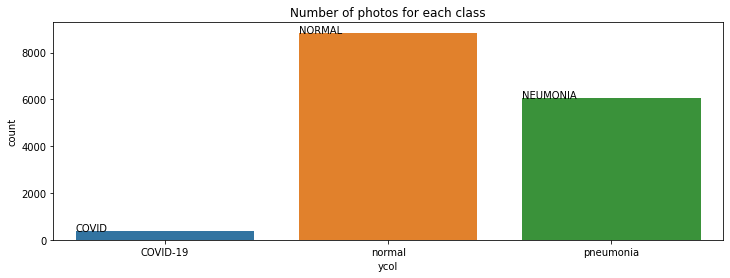

In [12]:
plot_label_per_class(data['ycol'])

In [13]:
data['ycol'].value_counts()

normal       8851
pneumonia    6045
COVID-19      379
Name: ycol, dtype: int64

Luego de ver estos datos, es claro nuestro problema de desbalanceo de las clases.

Frente al mismo hay dos alternativas:
- Over Sampling: deberiamos realizar las copias necesarias de las imagenes de covid para igualar en cantidad a las demas clases.
- Under Sampling: en este caso deberiamos dropear imagenes de las demas clases para igualar la cantidad de la clase COVID.

Plantearemos ambos metodos.

## OverSampling

In [14]:
data_covid = data[data['ycol'] == 'COVID-19']
data_normal = data[data['ycol'] == 'normal']
data_pneumonia = data[data['ycol'] == 'pneumonia']

In [15]:
data_covid = data_covid.loc[data_covid.index.repeat(20)].reset_index(drop=True)

In [16]:
data_covid = data_covid[:-1380]
data_normal = data_normal[:-2651]
data_pneumonia = data_pneumonia[:-45]

In [17]:
frames = [data_covid, data_normal, data_pneumonia]

dataset_os = pd.concat(frames)
dataset_os = dataset_os.sample(frac=1).reset_index(drop=True)

In [18]:
dataset_os["id"] = dataset_os.index

In [19]:
dataset_os

id                                      xcol       ycol dataset
0          0  601383f6-7a06-46c1-ae17-cc09b61a8c5f.png     normal    rsna
1          1  6b78d3dc-4db6-4ab9-9e7b-2d91dff9c4c2.png     normal    rsna
2          2                  nejmoa2001191_f5-PA.jpeg   COVID-19   cohen
3          3  368d0726-3481-4f66-81a2-f89bb7294ca1.png  pneumonia    rsna
4          4  46da5af2-a757-4670-90cb-5cc59c1e6d87.png  pneumonia    rsna
...      ...                                       ...        ...     ...
18395  18395  807f9785-d0b1-46ed-9535-0b743cc89a33.png     normal    rsna
18396  18396  c6ffc89e-d5ca-4107-8d97-c4ea219465dd.png     normal    rsna
18397  18397  98b85e3e-79db-4bf5-9d13-5abc8c767dc2.png     normal    rsna
18398  18398  c44c6b39-ad2c-4b37-bd08-4b3ab81166a8.png     normal    rsna
18399  18399  734d657a-1013-497d-8462-c2ed741466dd.png     normal    rsna

[18400 rows x 4 columns]

### Distribucion de datos

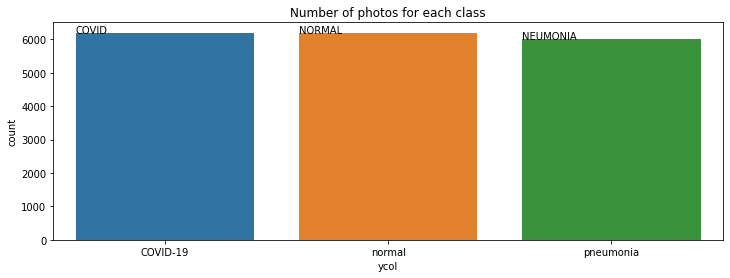

In [20]:
plot_label_per_class(dataset_os['ycol'])

In [21]:
dataset_os['ycol'].value_counts()

COVID-19     6200
normal       6200
pneumonia    6000
Name: ycol, dtype: int64

## Dataset Test

In [22]:
import random
num = []
random.seed(2020)
num = random.sample(range(1,18081), 400)

In [23]:
dataset_test = pd.DataFrame()

for x in num:
  dataset_test = dataset_test.append(dataset_os[dataset_os.id == x])
  dataset_os = dataset_os.drop(dataset_os[dataset_os.id == x].index)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_dataframe(dataframe=dataset_test, directory='./photos/All Photos', \
                                              x_col='xcol', y_col='ycol', \
                                              shuffle=False, seed=5, \
                                              color_mode='rgb', \
                                              target_size=(224, 224), \
                                              batch_size=1)

Found 400 validated image filenames belonging to 3 classes.


# Informacion de las imagenes

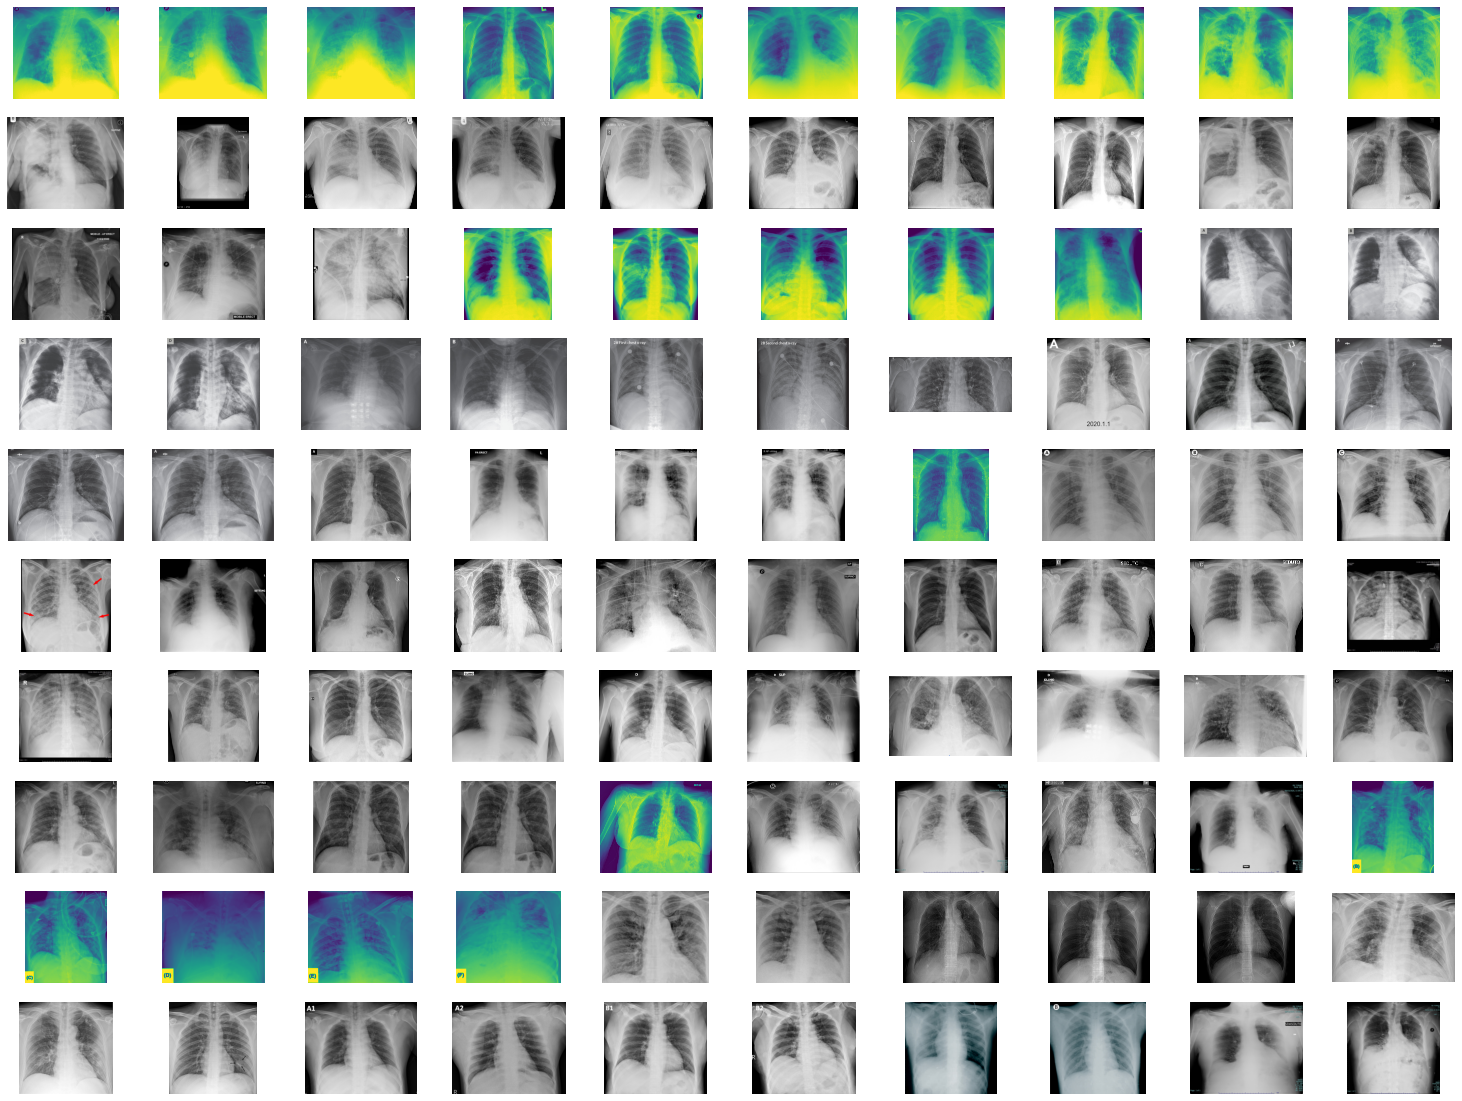

In [ ]:
images_dir = './photos/All Photos'
t_array = data['xcol'].to_numpy() 
t_array
f, ax = plt.subplots(10, 10, figsize=(26, 20))
for i in range(100):
        img = mpimg.imread(f"{images_dir}/"+t_array[i])
        ax[i//10, i%10].imshow(img)
        ax[i//10, i%10].axis('off')
plt.show()

Como vemos hay algunas imagenes que presentan color, mientras que otras parecen estar en escala de grises. 

Para comprobar que modo de color tienen realmente las imagenes, plotearemos las mismas por clase, para confirmar si las de color, por ejemplo, representan aquellos pacientes con COVID.

## Imagenes por clase

Primero descartarmeos la hipotesis de que las imagenes de color se agrupan 

### COVID-19

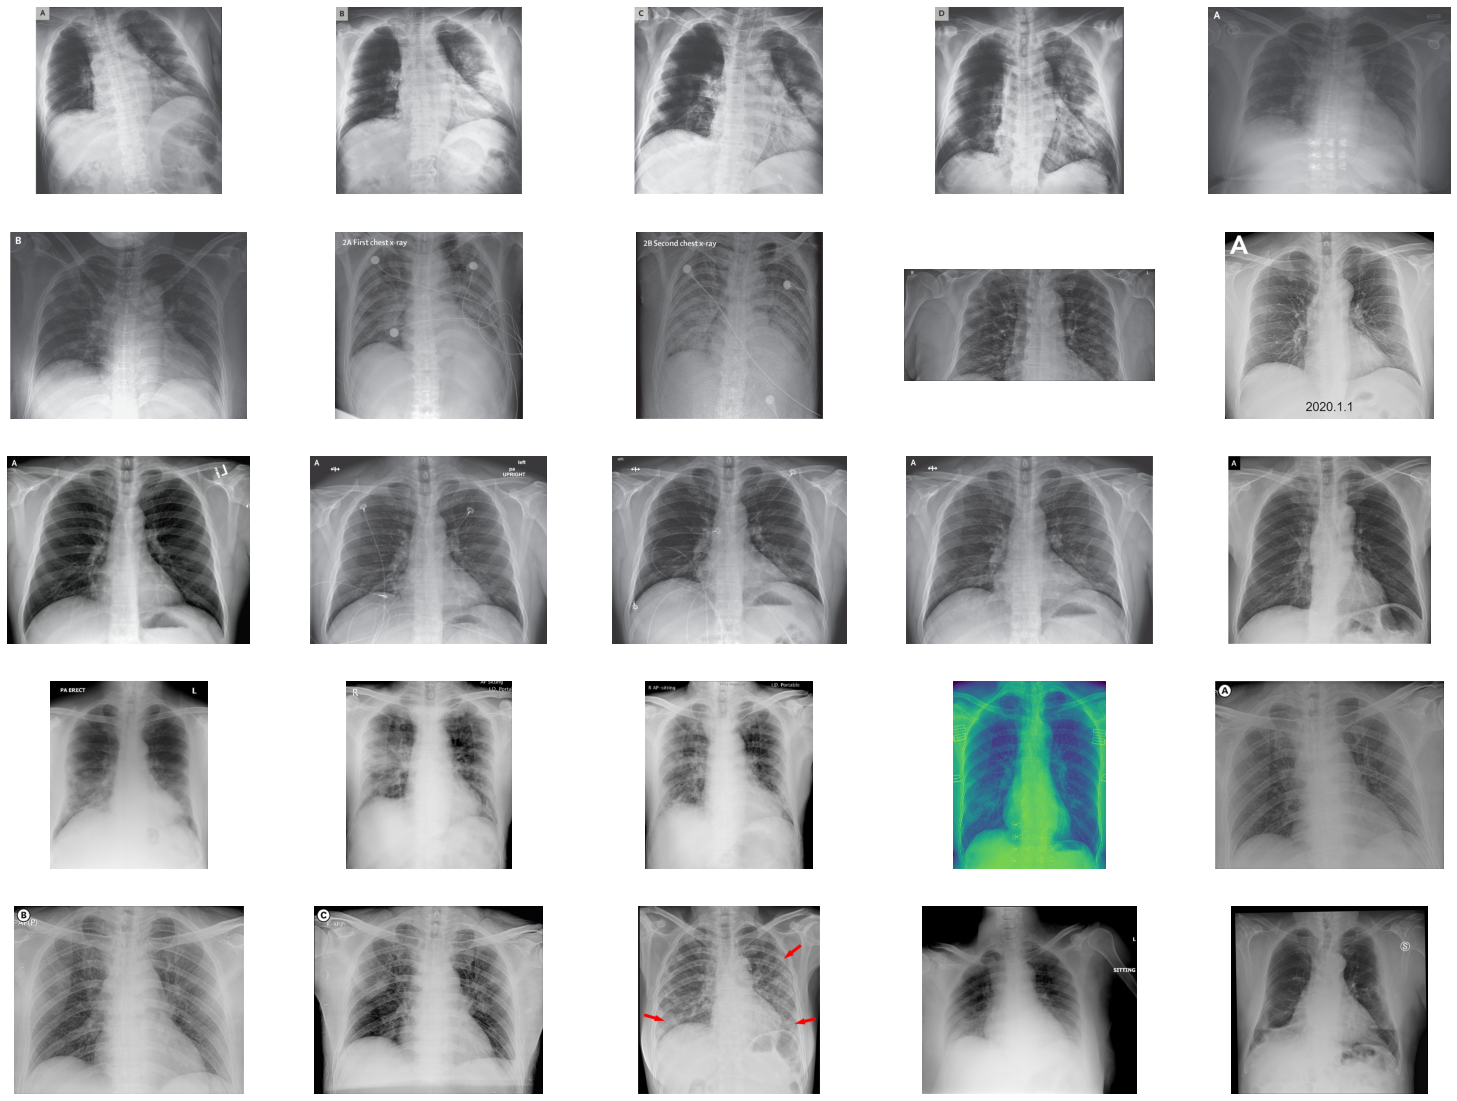

In [ ]:
images_dir = './photos/All Photos'
data_covid = data[data['ycol'] == 'COVID-19']
t_array =data_covid['xcol'].to_numpy() 

f, ax = plt.subplots(5, 5, figsize=(26, 20))
for i in range(25):
        img = mpimg.imread(f"{images_dir}/"+t_array[i])
        ax[i//5, i%5].imshow(img)
        ax[i//5, i%5].axis('off')
plt.show()

Para comparar veremos el shape de la primera imagen y la que parece estar en color.

In [ ]:
img_grey = mpimg.imread(f"{images_dir}/"+data_covid.iloc[0]['xcol'])
print('Primera imagen:')
print(img_grey.shape)

Primera imagen:
(888, 882, 3)


Lo que significa que es una imagen con 3 canales de colores, podemos decir entonces que es un modo de color rgb.


In [ ]:
img_color = mpimg.imread(f"{images_dir}/"+data_covid.iloc[18]['xcol'])
print('Primera imagen:')
print(img_color.shape)

Primera imagen:
(4095, 3342)


Aca esta nuestro primer problema, algunas imagenes no presentan la misma cantidad de colores. Para resolver este problema utilizaremos una configuracion en la funcion 'flow_from_dataframe', la cual nos permite transformar las imagenes al modo de color deseado antes de que entren a nuestro dataset de entrenamiento.

A continuacion veremos las imagenes de las clases restantes para comprobar que tambien poseen imagenes con distintos canales.

### Neumonia

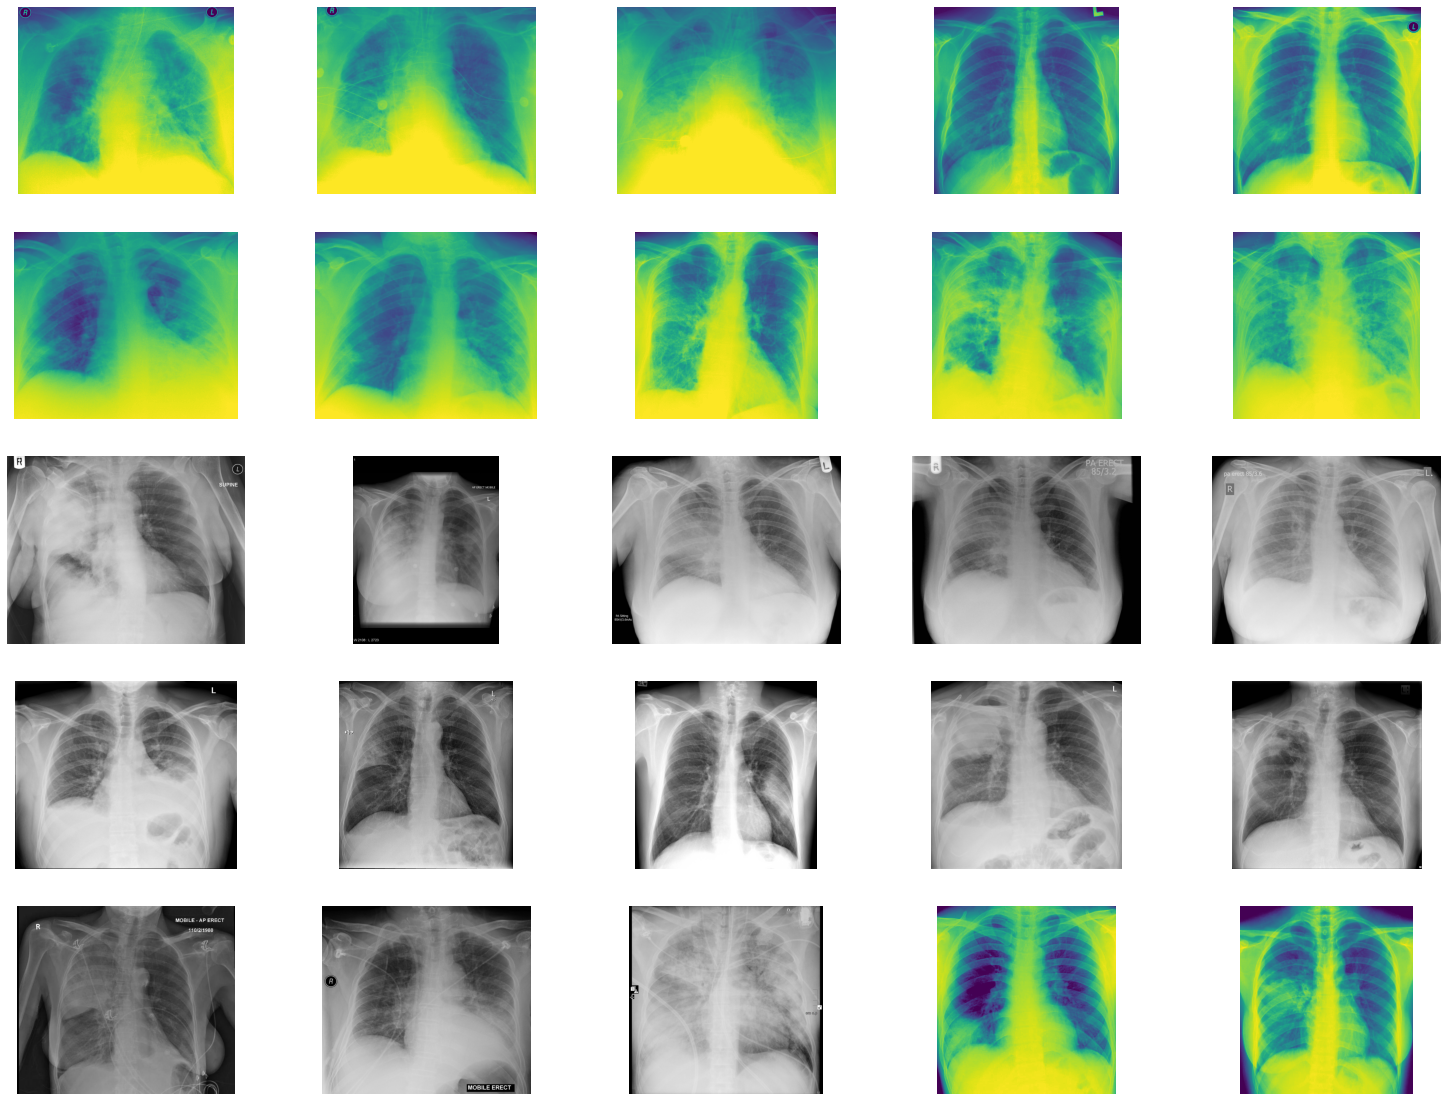

In [ ]:
images_dir = './photos/All Photos'
data_pneumonia = data[data['ycol'] == 'pneumonia']
t_array =data_pneumonia['xcol'].to_numpy() 

f, ax = plt.subplots(5, 5, figsize=(26, 20))
for i in range(25):
        img = mpimg.imread(f"{images_dir}/"+t_array[i])
        ax[i//5, i%5].imshow(img)
        ax[i//5, i%5].axis('off')
plt.show()

### Normal

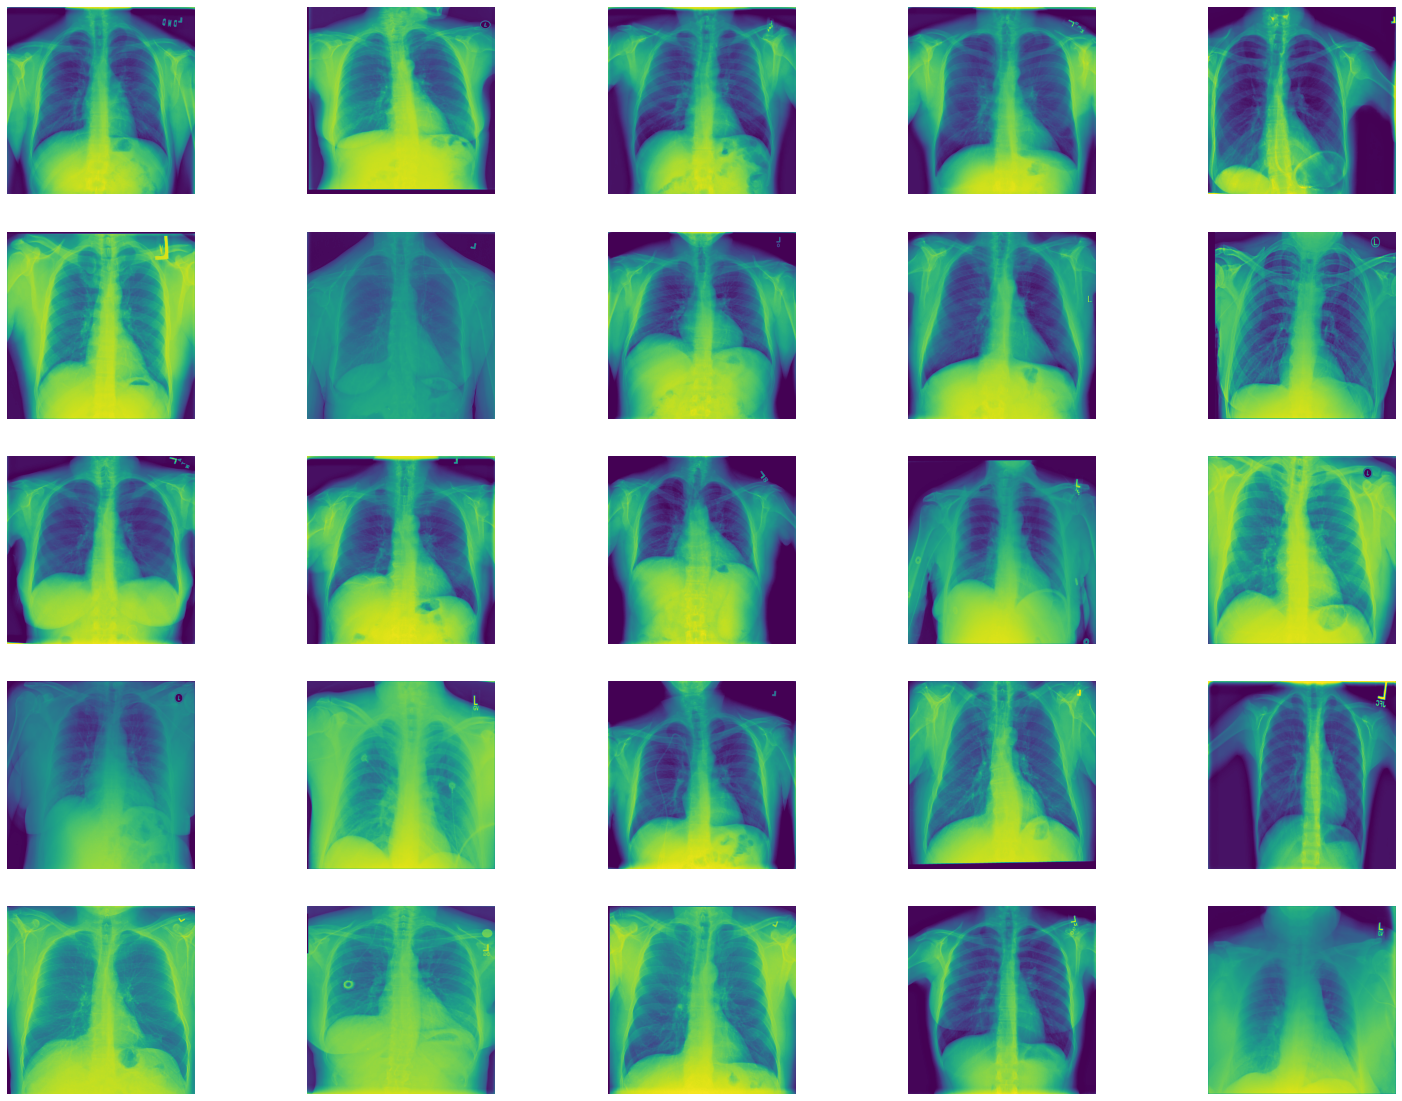

In [ ]:
images_dir = './photos/All Photos'
data_normal = data[data['ycol'] == 'normal']
t_array =data_normal['xcol'].to_numpy() 

f, ax = plt.subplots(5, 5, figsize=(26, 20))
for i in range(25):
        img = mpimg.imread(f"{images_dir}/"+t_array[i])
        ax[i//5, i%5].imshow(img)
        ax[i//5, i%5].axis('off')
plt.show()

Como vemos en esta clase gran cantidad de las imagenes presentan un solo canal de color. No indagaremos mas en esto ya que la solucion planteada anteriormente, es decir la de forzar el modo de color en el data preprocesing, soluciona este problema. 

De todas formas diremos que fue una cuestion de sampling, dentro de la clase 'Normal' hay imagenes de una canal y 3 canales de color.

# Entrenamiento de Modelos

In [ ]:
# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Training ImagaDataGenerator with Augmentation transf.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, shear_range=0.2, zoom_range=0.2, rotation_range=0.2, horizontal_flip=True)
                                   #rotation_range=15, shear_range=10,\
                                   #zoom_range=0.1, fill_mode='nearest', \
                                   #height_shift_range=0.05, width_shift_range=0.1\
                                   


# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'

#valid_gen = valid_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
valid_gen = valid_datagen.flow_from_dataframe(dataframe=result, directory='./photos/All Photos', 
                                              subset='validation',
                                              x_col='xcol', y_col='ycol', 
                                          
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=50,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')
# Create a flow from the directory using same seed and 'training' subset.

#train_gen = train_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
train_gen = train_datagen.flow_from_dataframe(dataframe=result, directory='./photos/All Photos', 
                                              subset='training', 
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=50,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')


NameError: ignored

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in enumerate(base_model.layers):
        layer[1].trainable = False

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
from keras.layers.core import Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import regularizers

dropoutRate = 0.7

x = Flatten()(base_model.output)
    
    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)
    
    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)

#     #add another fully connected layers with batch norm and dropout
# x = Dense(4096, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(dropoutRate)(x)

    #add logistic layer with all car classes
predictions = Dense(3, activation='softmax', kernel_initializer='random_uniform', bias_initializer='random_uniform', bias_regularizer=regularizers.l2(0.01), name='predictions')(x)
    
    # this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from keras.optimizers import SGD

learningRate = 0.001
lr_decay = 1e-4

sgd = SGD(lr=learningRate, decay=lr_decay, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks=[metrics_history])

Epoch 1/10
281/281 [==============================] - 614s 2s/step - loss: 1.1073 - accuracy: 0.7431 - val_loss: 1.2568 - val_accuracy: 0.5918
Epoch 2/10
281/281 [==============================] - 598s 2s/step - loss: 0.7368 - accuracy: 0.8023 - val_loss: 1.4412 - val_accuracy: 0.6140
Epoch 3/10
281/281 [==============================] - 591s 2s/step - loss: 0.6077 - accuracy: 0.8217 - val_loss: 0.6053 - val_accuracy: 0.6763
Epoch 4/10
281/281 [==============================] - 601s 2s/step - loss: 0.5407 - accuracy: 0.8330 - val_loss: 0.9097 - val_accuracy: 0.6274
Epoch 5/10
281/281 [==============================] - 610s 2s/step - loss: 0.4922 - accuracy: 0.8411 - val_loss: 0.9589 - val_accuracy: 0.6140
Epoch 6/10
281/281 [==============================] - 621s 2s/step - loss: 0.4709 - accuracy: 0.8457 - val_loss: 0.9711 - val_accuracy: 0.6318
Epoch 7/10
281/281 [==============================] - 630s 2s/step - loss: 0.4386 - accuracy: 0.8565 - val_loss: 1.8081 - val_accuracy: 0.6007

In [ ]:
score = model.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

71/71 [==============================] - 187s 3s/step
Test loss: 1.4507472515106201
Test accuracy: 0.6095662117004395


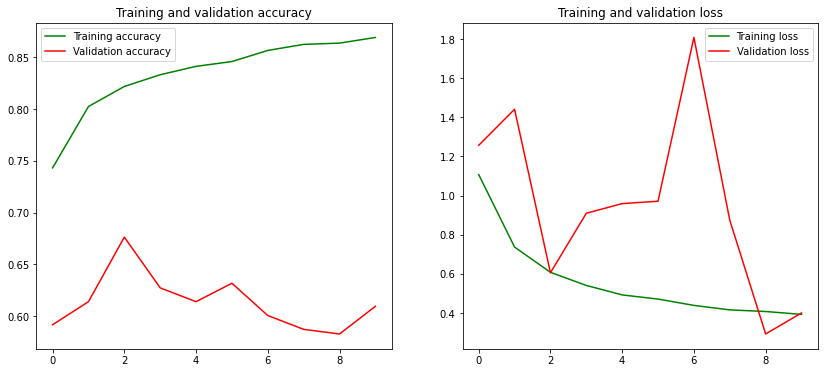

In [ ]:
plot_accuracy_and_loss(history)

In [ ]:
model.save('/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/COVID/Modelos/vgg16(5)')

In [ ]:
# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Training ImagaDataGenerator with Augmentation transf.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, rotation_range=0.2)
                                   #shear_range=0.2, zoom_range=0.2, rotation_range=0.2, horizontal_flip=True)
                                   #rotation_range=15, shear_range=10,\
                                   #zoom_range=0.1, fill_mode='nearest', \
                                   #height_shift_range=0.05, width_shift_range=0.1\
                                   


# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'

#valid_gen = valid_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
valid_gen = valid_datagen.flow_from_dataframe(dataframe=result, directory='./photos/All Photos', 
                                              subset='validation',
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=2020,
                                              target_size=(224, 224), 
                                              batch_size=128,
                                              class_mode='categorical')
# Create a flow from the directory using same seed and 'training' subset.

#train_gen = train_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
train_gen = train_datagen.flow_from_dataframe(dataframe=result, directory='./photos/All Photos', 
                                              subset='training', 
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=2020,
                                              target_size=(224, 224), 
                                              batch_size=128,
                                              class_mode='categorical')

Found 3600 validated image filenames belonging to 3 classes.
Found 14401 validated image filenames belonging to 3 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in enumerate(base_model.layers):
        layer[1].trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
from keras.layers.core import Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import regularizers

# dropoutRate = 0.7
dropoutRate = 0.6

x = Flatten()(base_model.output)
    
    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)
    
    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)

    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)

    #add logistic layer with all car classes
predictions = Dense(3, activation='softmax', kernel_initializer='random_uniform', bias_initializer='random_uniform', bias_regularizer=regularizers.l2(0.01), name='predictions')(x)
    
    # this is the model we will train


  
model2 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from keras.optimizers import SGD
learningRate = 0.001
lr_decay = 1e-4

sgd = SGD(lr=learningRate, decay=lr_decay, 
         #momentum=0.9, 
          momentum=0.8, 
          nesterov=True)

model2.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks=[metrics_history])

Epoch 1/10
 19/113 [====>.........................] - ETA: 10:00 - loss: 1.8614 - accuracy: 0.5272

In [ ]:
score = model2.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

48/48 [==============================] - 44s 908ms/step
Test loss: 0.5537562966346741
Test accuracy: 0.8556464910507202


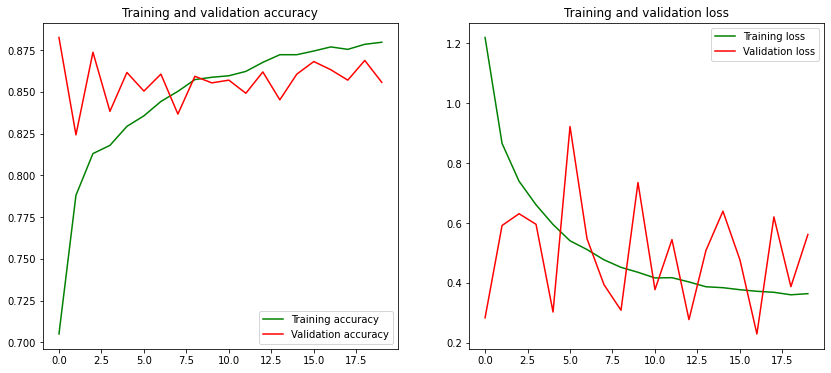

In [ ]:
plot_accuracy_and_loss(history2)

In [ ]:
model2.save('/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/COVID/Modelos/vgg19(1)')

In [ ]:
# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Training ImagaDataGenerator with Augmentation transf.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, shear_range=0.2, zoom_range=0.2, rotation_range=0.2, horizontal_flip=True, vertical_flip=True)
                                   #rotation_range=15, shear_range=10,\
                                   #zoom_range=0.1, fill_mode='nearest', \
                                   #height_shift_range=0.05, width_shift_range=0.1\
                                   


# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'

#valid_gen = valid_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
valid_gen = valid_datagen.flow_from_dataframe(dataframe=data, directory='./photos/All Photos', 
                                              subset='validation',
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=42,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')
# Create a flow from the directory using same seed and 'training' subset.

#train_gen = train_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
train_gen = train_datagen.flow_from_dataframe(dataframe=data, directory='./photos/All Photos', 
                                              subset='training', 
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=42,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')

Found 3055 validated image filenames belonging to 3 classes.
Found 12220 validated image filenames belonging to 3 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in enumerate(base_model.layers):
        layer[1].trainable = False

80142336/80134624 [==============================] - 3s 0us/step


In [ ]:
from keras.layers.core import Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import regularizers

dropoutRate = 0.7


x = Flatten()(base_model.output)
    
    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)
    
    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)

    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)

    #add logistic layer with all car classes
predictions = Dense(3, activation='softmax', kernel_initializer='random_uniform', bias_initializer='random_uniform', bias_regularizer=regularizers.l2(0.01), name='predictions')(x)
    
    # this is the model we will train


  
model3 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from keras.optimizers import SGD
learningRate = 0.0001
lr_decay = 1e-4

sgd = SGD(lr=learningRate, decay=lr_decay, 
         #momentum=0.9, 
          momentum=0.7, 
          nesterov=True)

model3.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    epochs=20,
    callbacks=[metrics_history])

Epoch 1/20
191/191 [==============================] - 323s 2s/step - loss: 2.3727 - accuracy: 0.4527 - val_loss: 0.2592 - val_accuracy: 0.8746
Epoch 2/20
191/191 [==============================] - 297s 2s/step - loss: 2.0067 - accuracy: 0.5388 - val_loss: 0.6331 - val_accuracy: 0.8498
Epoch 3/20
191/191 [==============================] - 280s 1s/step - loss: 1.7823 - accuracy: 0.5856 - val_loss: 0.6053 - val_accuracy: 0.8478
Epoch 4/20
191/191 [==============================] - 278s 1s/step - loss: 1.6710 - accuracy: 0.6034 - val_loss: 0.2290 - val_accuracy: 0.8442
Epoch 5/20
191/191 [==============================] - 268s 1s/step - loss: 1.6011 - accuracy: 0.6311 - val_loss: 0.5749 - val_accuracy: 0.8478
Epoch 6/20
191/191 [==============================] - 265s 1s/step - loss: 1.4839 - accuracy: 0.6506 - val_loss: 0.5275 - val_accuracy: 0.8599
Epoch 7/20
191/191 [==============================] - 269s 1s/step - loss: 1.4907 - accuracy: 0.6538 - val_loss: 0.3304 - val_accuracy: 0.8592

In [ ]:
score = model3.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

48/48 [==============================] - 40s 839ms/step
Test loss: 0.40804392099380493
Test accuracy: 0.8693944215774536


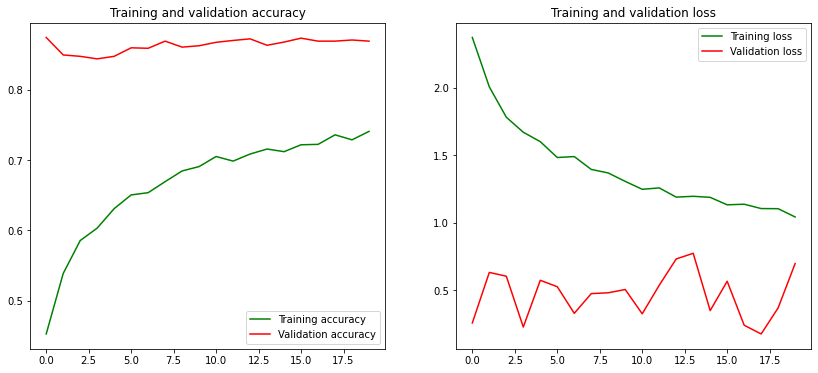

In [ ]:
plot_accuracy_and_loss(history3)

In [ ]:
model3.save('/content/drive/My Drive/Modelos/vgg19(2-Covid)')

In [ ]:
https://drive.google.com/open?id=1rFeioJZiVBRovR5A9Vavw8Qvtwsumeop

In [ ]:
!wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=12zKoiUX1dCP0tiMjf46yn0OccOO-qDn7" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p' > /tmp/confirm && wget --load-cookies /tmp/cookies.txt --no-check-certificate "https://docs.google.com/uc?export=download&confirm="$(cat /tmp/confirm)"&id=12zKoiUX1dCP0tiMjf46yn0OccOO-qDn7" -O 'model' && rm /tmp/cookies.txt /tmp/confirm

--2020-06-16 01:50:33--  https://docs.google.com/uc?export=download&id=12zKoiUX1dCP0tiMjf46yn0OccOO-qDn7
Resolving docs.google.com (docs.google.com)... 108.177.126.138, 108.177.126.139, 108.177.126.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-06-16 01:50:34 (54.9 MB/s) - written to stdout [3244]

--2020-06-16 01:50:34--  https://docs.google.com/uc?export=download&confirm=pAZX&id=12zKoiUX1dCP0tiMjf46yn0OccOO-qDn7
Resolving docs.google.com (docs.google.com)... 108.177.126.102, 108.177.126.139, 108.177.126.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-88-docs.googleusercontent.com/docs/securesc/j2k97nic2reo1lb40qdmfg1qn82g337a/ie

In [ ]:
https://drive.google.com/open?id=12zKoiUX1dCP0tiMjf46yn0OccOO-qDn7

In [ ]:
!ls

AllPhotos.zip  data_annotations.csv  drive  model  photos  sample_data


In [ ]:
trained_model = load_model('model')
trained_model.evaluate(valid_gen)

71/71 [==============================] - 179s 3s/step - loss: 1.4326 - accuracy: 0.6096


[1.4325896501541138, 0.6095662117004395]

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
filenames = valid_gen.filenames
nb_samples = len(filenames)
print(nb_samples)

4495


In [ ]:
predict = trained_model.predict_generator(valid_gen,steps = nb_samples)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
predicted_class_indices=np.argmax(predict,axis=1)

In [ ]:
LABELS = (train_gen.class_indices)
LABELS = dict((v,k) for k,v in LABELS.items())
predictions = [LABELS[k] for k in predicted_class_indices]
true_classes = [LABELS[k] for k in valid_gen.classes]

In [ ]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,
                      "Class": true_classes})
results

Filename Predictions     Class
0     auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...    COVID-19  COVID-19
1     auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...    COVID-19  COVID-19
2     auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...    COVID-19  COVID-19
3     auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...      normal  COVID-19
4     auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...    COVID-19  COVID-19
...                                                 ...         ...       ...
4490                                    COVID-00048.png    COVID-19  COVID-19
4491                                    COVID-00048.png    COVID-19  COVID-19
4492                                    COVID-00048.png    COVID-19  COVID-19
4493                                    COVID-00048.png    COVID-19  COVID-19
4494                                    COVID-00048.png      normal  COVID-19

[4495 rows x 3 columns]

In [ ]:
score = trained_model.evaluate(valid_gen, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4325896501541138
Test accuracy: 0.6095662117004395


In [ ]:
true_classes = np.array(true_classes)
predictions = np.array(predictions)

print(classification_report(true_classes, predictions))

              precision    recall  f1-score   support

    COVID-19       1.00      0.61      0.76      4495
      normal       0.00      0.00      0.00         0
   pneumonia       0.00      0.00      0.00         0

    accuracy                           0.61      4495
   macro avg       0.33      0.20      0.25      4495
weighted avg       1.00      0.61      0.76      4495



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_mat = confusion_matrix(true_classes, predictions)
conf_mat

array([[2740,  735, 1020],
       [   0,    0,    0],
       [   0,    0,    0]])

In [ ]:
FP = conf_mat.sum(axis=0) - np.diag(conf_mat)  
FN = conf_mat.sum(axis=1) - np.diag(conf_mat)
TP = np.diag(conf_mat)
TN = conf_mat.sum() - (FP + FN + TP)
FP = FP.sum()
FN = FN.sum()
TP = TP.sum()
TN = TN.sum()

In [ ]:
TPR = TP/(TP+FN) * 100
TNR = TN/(TN+FP) * 100
PPV = TP/(TP+FP) * 100
NPV = TN/(TN+FN) * 100
FPR = FP/(FP+TN) * 100
FNR = FN/(TP+FN) * 100
FDR = FP/(TP+FP) * 100
ER = (FP + FN) / (FP + FN + TP + TP) * 100

In [ ]:
print("Sensitivity : " + str(TPR), "Specificity: " + str(TNR), "positive predictive value: " + str(PPV),
"Negative predictive value: " + str(NPV), "False Positive Rate: " + str(FPR),"False negative rate: " + str(FNR),
"False discovery rate: " + str(FDR), "Error rate: " + str(ER), sep='\n')

Sensitivity : 79.34533551554827
Specificity: 89.67266775777414
positive predictive value: 79.34533551554827
Negative predictive value: 89.67266775777414
False Positive Rate: 10.327332242225859
False negative rate: 20.654664484451718
False discovery rate: 20.654664484451718
Error rate: 20.654664484451718


In [ ]:
def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]

def process_image_file(filepath, top_percent, size):
    img = cv2.imread(filepath)
    img = crop_top(img, percent=top_percent)
    img = central_crop(img)
    img = cv2.resize(img, (size, size))
    return img

def random_ratio_resize(img, prob=0.3, delta=0.1):
    if np.random.rand() >= prob:
        return img
    ratio = img.shape[0] / img.shape[1]
    ratio = np.random.uniform(max(ratio - delta, 0.01), ratio + delta)

    if ratio * img.shape[1] <= img.shape[1]:
        size = (int(img.shape[1] * ratio), img.shape[1])
    else:
        size = (img.shape[0], int(img.shape[0] / ratio))

    dh = img.shape[0] - size[1]
    top, bot = dh // 2, dh - dh // 2
    dw = img.shape[1] - size[0]
    left, right = dw // 2, dw - dw // 2

    if size[0] > 480 or size[1] > 480:
        print(img.shape, size, ratio)

    img = cv2.resize(img, size)
    img = cv2.copyMakeBorder(img, top, bot, left, right, cv2.BORDER_CONSTANT,
                             (0, 0, 0))

    if img.shape[0] != 480 or img.shape[1] != 480:
        raise ValueError(img.shape, size)
    return img

_augmentation_transform = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    zoom_range=(0.85, 1.15),
    fill_mode='constant',
    cval=0.,
)

def apply_augmentation(img):
    img = random_ratio_resize(img)
    img = _augmentation_transform.random_transform(img)
    return img

def _process_csv_file(file):
    with open(file, 'r') as fr:
        files = fr.readlines()
    return files

class BalanceCovidDataset(keras.utils.Sequence):
    'Generates data for Keras'

    def __init__(
            self,
            data_dir,
            csv_file,
            is_training=True,
            batch_size=8,
            input_shape=(224, 224),
            n_classes=3,
            num_channels=3,
            mapping={
                'normal': 0,
                'pneumonia': 1,
                'COVID-19': 2
            },
            shuffle=True,
            augmentation=apply_augmentation,
            covid_percent=0.3,
            class_weights=[1., 1., 6.],
            top_percent=0.08
    ):
        'Initialization'
        self.datadir = data_dir
        self.dataset = _process_csv_file(csv_file)
        self.is_training = is_training
        self.batch_size = batch_size
        self.N = len(self.dataset)
        self.input_shape = input_shape
        self.n_classes = n_classes
        self.num_channels = num_channels
        self.mapping = mapping
        self.shuffle = True
        self.covid_percent = covid_percent
        self.class_weights = class_weights
        self.n = 0
        self.augmentation = augmentation
        self.top_percent = top_percent

        datasets = {'normal': [], 'pneumonia': [], 'COVID-19': []}
        for l in self.dataset:
            datasets[l.split()[2]].append(l)
        self.datasets = [
            datasets['normal'] + datasets['pneumonia'],
            datasets['COVID-19'],
        ]
        print(len(self.datasets[0]), len(self.datasets[1]))

        self.on_epoch_end()

    def __next__(self):
        # Get one batch of data
        batch_x, batch_y, weights = self.__getitem__(self.n)
        # Batch index
        self.n += 1

        # If we have processed the entire dataset then
        if self.n >= self.__len__():
            self.on_epoch_end
            self.n = 0

        return batch_x, batch_y, weights

    def __len__(self):
        return int(np.ceil(len(self.datasets[0]) / float(self.batch_size)))

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle == True:
            for v in self.datasets:
                np.random.shuffle(v)

    def __getitem__(self, idx):
        batch_x, batch_y = np.zeros(
            (self.batch_size, *self.input_shape,
             self.num_channels)), np.zeros(self.batch_size)

        batch_files = self.datasets[0][idx * self.batch_size:(idx + 1) *
                                       self.batch_size]

        # upsample covid cases
        covid_size = max(int(len(batch_files) * self.covid_percent), 1)
        covid_inds = np.random.choice(np.arange(len(batch_files)),
                                      size=covid_size,
                                      replace=False)
        covid_files = np.random.choice(self.datasets[1],
                                       size=covid_size,
                                       replace=False)
        for i in range(covid_size):
            batch_files[covid_inds[i]] = covid_files[i]

        for i in range(len(batch_files)):
            sample = batch_files[i].split()

            if self.is_training:
                folder = 'train'
            else:
                folder = 'test'

            x = process_image_file(os.path.join(self.datadir, folder, sample[1]),
                                   self.top_percent,
                                   self.input_shape[0])

            if self.is_training and hasattr(self, 'augmentation'):
                x = self.augmentation(x)

            x = x.astype('float32') / 255.0
            y = self.mapping[sample[2]]

            batch_x[i] = x
            batch_y[i] = y

        class_weights = self.class_weights
        weights = np.take(class_weights, batch_y.astype('int64'))

        return batch_x, keras.utils.to_categorical(batch_y, num_classes=self.n_classes), weights

In [ ]:
import os, argparse, pathlib

parser = argparse.ArgumentParser(description='COVID-Net Training Script')
parser.add_argument('--epochs', default=10, type=int, help='Number of epochs')
parser.add_argument('--lr', default=0.0002, type=float, help='Learning rate')
parser.add_argument('--bs', default=8, type=int, help='Batch size')
parser.add_argument('--weightspath', default='models/COVIDNet-CXR3-S', type=str, help='Path to output folder')
parser.add_argument('--metaname', default='model.meta', type=str, help='Name of ckpt meta file')
parser.add_argument('--ckptname', default='model-1014', type=str, help='Name of model ckpts')
parser.add_argument('--trainfile', default='train_COVIDx3.txt', type=str, help='Name of train file')
parser.add_argument('--testfile', default='test_COVIDx3.txt', type=str, help='Name of test file')
parser.add_argument('--name', default='COVIDNet', type=str, help='Name of folder to store training checkpoints')
parser.add_argument('--datadir', default='./data', type=str, help='Path to data folder')
parser.add_argument('--covid_weight', default=4., type=float, help='Class weighting for covid')
parser.add_argument('--covid_percent', default=0.3, type=float, help='Percentage of covid samples in batch')
parser.add_argument('--input_size', default=480, type=int, help='Size of input (ex: if 480x480, --input_size 480)')
parser.add_argument('--top_percent', default=0.08, type=float, help='Percent top crop from top of image')
parser.add_argument('--in_tensorname', default='input_1:0', type=str, help='Name of input tensor to graph')
parser.add_argument('--out_tensorname', default='norm_dense_1/Softmax:0', type=str, help='Name of output tensor from graph')
parser.add_argument('--logit_tensorname', default='norm_dense_1/MatMul:0', type=str, help='Name of logit tensor for loss')
parser.add_argument('--label_tensorname', default='norm_dense_1_target:0', type=str, help='Name of label tensor for loss')
parser.add_argument('--weights_tensorname', default='norm_dense_1_sample_weights:0', type=str, help='Name of sample weights tensor for loss')

args = parser.parse_args()

usage: ipykernel_launcher.py [-h] [--epochs EPOCHS] [--lr LR] [--bs BS]
                             [--weightspath WEIGHTSPATH] [--metaname METANAME]
                             [--ckptname CKPTNAME] [--trainfile TRAINFILE]
                             [--testfile TESTFILE] [--name NAME]
                             [--datadir DATADIR] [--covid_weight COVID_WEIGHT]
                             [--covid_percent COVID_PERCENT]
                             [--input_size INPUT_SIZE]
                             [--top_percent TOP_PERCENT]
                             [--in_tensorname IN_TENSORNAME]
                             [--out_tensorname OUT_TENSORNAME]
                             [--logit_tensorname LOGIT_TENSORNAME]
                             [--label_tensorname LABEL_TENSORNAME]
                             [--weights_tensorname WEIGHTS_TENSORNAME]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-2f7d65c0-4afb-4b04-bcfc-9e80c

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
!ls

AllPhotos.zip  data_annotations.csv  drive  model  photos  sample_data


In [ ]:
generator = BalanceCovidDataset(data_dir='./data', csv_file='./data_annotations.csv',batch_size=64, input_shape=(254,254)), covid_percent=0.3, class_weights=[1., 1., 0.3], top_percent=0.08)

SyntaxError: ignored

In [ ]:
generator = BalanceCovidDataset(data_dir='./photos', 
                                csv_file='./data_annotations.csv',
                                batch_size=64, input_shape=(254,254), covid_percent=0.3, class_weights=[1., 1., 0.3], top_percent=0.08)

IndexError: ignored

In [ ]:
# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Training ImagaDataGenerator with Augmentation transf.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, shear_range=0.2, zoom_range=0.2, rotation_range=0.2, horizontal_flip=True)
                                   #rotation_range=15, shear_range=10,\
                                   #zoom_range=0.1, fill_mode='nearest', \
                                   #height_shift_range=0.05, width_shift_range=0.1\


                                   


# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'

#valid_gen = valid_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
valid_gen = valid_datagen.flow_from_dataframe(dataframe=data, directory='./photos/All Photos', 
                                              subset='validation',
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=50,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')
# Create a flow from the directory using same seed and 'training' subset.

#train_gen = train_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
train_gen = train_datagen.flow_from_dataframe(dataframe=data, directory='./photos/All Photos', 
                                              subset='training', 
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=50,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')

Found 3055 validated image filenames belonging to 3 classes.
Found 12220 validated image filenames belonging to 3 classes.


In [ ]:
#train_gen = sm.fit_sample(train_gen)
train_img, train_labels = next(train_gen)
#

In [ ]:
from keras.applications.vgg19 import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in enumerate(base_model.layers):
        layer[1].trainable = False

80142336/80134624 [==============================] - 3s 0us/step


In [ ]:
from keras.layers.core import Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import regularizers

# dropoutRate = 0.7
dropoutRate = 0.6

x = Flatten()(base_model.output)
    
    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)
    
    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)

    #add another fully connected layers with batch norm and dropout
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropoutRate)(x)

    #add logistic layer with all car classes
predictions = Dense(3, activation='softmax', kernel_initializer='random_uniform', bias_initializer='random_uniform', bias_regularizer=regularizers.l2(0.01), name='predictions')(x)
    
    # this is the model we will train


  
model4 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
mapping={
          'normal': 1,
          'pneumonia': 1,
          'COVID-19': 6
            },

           

In [ ]:
from keras.optimizers import SGD
learningRate = 0.001
lr_decay = 1e-4

sgd = SGD(lr=learningRate, decay=lr_decay, 
         #momentum=0.9, 
          momentum=0.8, 
          nesterov=True)

model4.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    epochs=5,
    callbacks=[metrics_history],
    class_weight=[1., 1., 6.])

Epoch 1/5
191/191 [==============================] - 320s 2s/step - loss: 0.7999 - accuracy: 0.7962 - val_loss: 0.4579 - val_accuracy: 0.8805
Epoch 2/5
191/191 [==============================] - 302s 2s/step - loss: 0.7038 - accuracy: 0.8137 - val_loss: 0.4851 - val_accuracy: 0.8455
Epoch 3/5
191/191 [==============================] - 298s 2s/step - loss: 0.6369 - accuracy: 0.8247 - val_loss: 0.7031 - val_accuracy: 0.8380
Epoch 4/5
191/191 [==============================] - 298s 2s/step - loss: 0.5668 - accuracy: 0.8349 - val_loss: 0.6238 - val_accuracy: 0.8625
Epoch 5/5
191/191 [==============================] - 300s 2s/step - loss: 0.5194 - accuracy: 0.8446 - val_loss: 0.3614 - val_accuracy: 0.8468


In [ ]:
score = model4.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

48/48 [==============================] - 42s 877ms/step
Test loss: 0.8887017965316772
Test accuracy: 0.8468084931373596


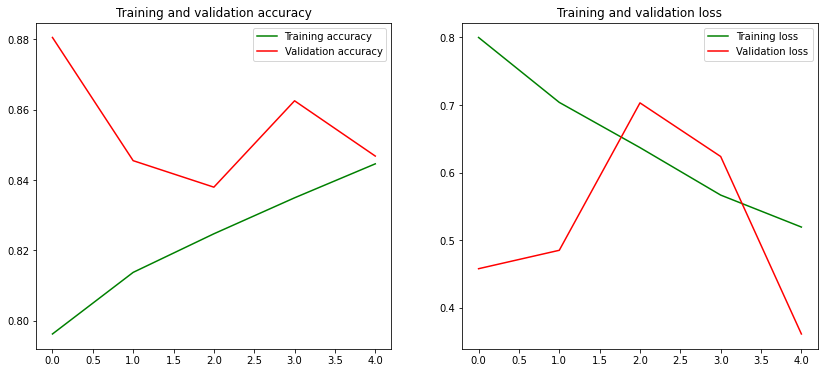

In [ ]:
plot_accuracy_and_loss(history4)

In [ ]:
model4.save('/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/COVID/Modelos/vgg19(balanced-2)')

In [ ]:
trained_model = model4
trained_model.evaluate(valid_gen)

48/48 [==============================] - 45s 934ms/step


[0.30072155594825745, 0.8468084931373596]

In [ ]:
filenames = valid_gen.filenames
nb_samples = len(filenames)
print(nb_samples)

3055


In [ ]:
predict = trained_model.predict_generator(valid_gen,steps = nb_samples)


KeyboardInterrupt: ignored

In [ ]:
predicted_class_indices=np.argmax(predict,axis=1)

In [ ]:
LABELS = (train_gen.class_indices)
LABELS = dict((v,k) for k,v in LABELS.items())
predictions = [LABELS[k] for k in predicted_class_indices]
true_classes = [LABELS[k] for k in valid_gen.classes]

In [ ]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,
                      "Class": true_classes})
printr(results)

In [ ]:
def evaluate(model, valid_gen, train_gen):  
  trained_model = load_model(model)
  trained_model.evaluate(valid_gen)

  filenames = valid_gen.filenames
  nb_samples = len(filenames)
  print(nb_samples)

  predict = trained_model.predict_generator(valid_gen,steps = nb_samples)

  predicted_class_indices=np.argmax(predict,axis=1)

  LABELS = (train_gen.class_indices)
  LABELS = dict((v,k) for k,v in LABELS.items())
  predictions = [LABELS[k] for k in predicted_class_indices]
  true_classes = [LABELS[k] for k in valid_gen.classes]

  results=pd.DataFrame({"Filename":filenames,
                        "Predictions":predictions,
                        "Class": true_classes})
  printr(results)


  score = trained_model.evaluate(valid_gen, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  true_classes = np.array(true_classes)
  predictions = np.array(predictions)

  print(classification_report(true_classes, predictions))

In [ ]:
evaluate(model4, valid_gen, train_gen)

TypeError: ignored

In [ ]:
data

id  ... dataset
0                                         3  ...   cohen
1                                         3  ...   cohen
2                                         3  ...   cohen
3                                         7  ...   cohen
4                                         7  ...   cohen
...                                     ...  ...     ...
15270  2c917d3a-95cb-4c11-802c-f83e28cb37bc  ...    rsna
15271  3040d9d7-d895-453f-887c-616c10531960  ...    rsna
15272  c07f52df-d481-434f-84c1-04263926ac40  ...    rsna
15273  c109061a-d815-4cae-8343-9230d8024adf  ...    rsna
15274  c18d1138-ba74-4af5-af21-bdd4d2c96bb5  ...    rsna

[15275 rows x 4 columns]

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(data.classes), 
            data.classes)

AttributeError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(data.drop('ycol', axis=1), data['ycol'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.keras import balanced_batch_generator

class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = batch_size
        self._shape = x.shape        
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)

    def __len__(self):
        return self._shape[0] // self.batch_size

    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

bgen = BalancedDataGenerator(train_img, train_labels, train_datagen, batch_size=32)
steps_per_epoch = bgen.steps_per_epoch

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_gen = [bgen.__getitem__(0)[1] for i in range(steps_per_epoch)]
print(np.unique(y_gen, return_counts=True))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(array([0., 1.], dtype=float32), array([128,  64]))


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
oversample = RandomOverSampler(sampling_strategy=0.5)

In [ ]:
X_over, y_over = oversample.fit_resample(train_img, data['ycol'])

ValueError: ignored

In [ ]:
train_img

array([[[[0.62055755, 0.62055755, 0.62055755],
         [0.5419048 , 0.5419048 , 0.5419048 ],
         [0.49218386, 0.49218386, 0.49218386],
         ...,
         [0.4977684 , 0.4977684 , 0.4977684 ],
         [0.5079562 , 0.5079562 , 0.5079562 ],
         [0.5488047 , 0.5488047 , 0.5488047 ]],

        [[0.63929784, 0.63929784, 0.63929784],
         [0.55507815, 0.55507815, 0.55507815],
         [0.49585918, 0.49585918, 0.49585918],
         ...,
         [0.42636794, 0.42636794, 0.42636794],
         [0.46006912, 0.46006912, 0.46006912],
         [0.5461125 , 0.5461125 , 0.5461125 ]],

        [[0.6454312 , 0.6454312 , 0.6454312 ],
         [0.55269855, 0.55269855, 0.55269855],
         [0.48980033, 0.48980033, 0.48980033],
         ...,
         [0.43975458, 0.43975458, 0.43975458],
         [0.47648978, 0.47648978, 0.47648978],
         [0.55759317, 0.55759317, 0.55759317]],

        ...,

        [[0.32932347, 0.32932347, 0.32932347],
         [0.10869125, 0.10869125, 0.10869125]

## Modelo mobilnet

In [ ]:
# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Training ImagaDataGenerator with Augmentation transf.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=0.2, horizontal_flip=True)
                                   #rotation_range=15, shear_range=10,\
                                   #zoom_range=0.1, fill_mode='nearest', \
                                   #height_shift_range=0.05, width_shift_range=0.1\
                                   
# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'

#valid_gen = valid_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
valid_gen = valid_datagen.flow_from_dataframe(dataframe=dataset_os, directory='./photos/All Photos', 
                                              subset='validation',
                                              color_mode='rgb', 
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=50,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')
# Create a flow from the directory using same seed and 'training' subset.

#train_gen = train_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
train_gen = train_datagen.flow_from_dataframe(dataframe=dataset_os, directory='./photos/All Photos', 
                                              subset='training', 
                                              x_col='xcol', y_col='ycol', 
                                              color_mode='rgb', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=50,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')


Found 3600 validated image filenames belonging to 3 classes.
Found 14400 validated image filenames belonging to 3 classes.


In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

model_mobilnet = Model(inputs=base_model.input,outputs=preds)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 2s 0us/step


In [ ]:
model_mobilnet.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [ ]:
for layer in model_mobilnet.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model_mobilnet.layers[:20]:
    layer.trainable=False
for layer in model_mobilnet.layers[20:]:
    layer.trainable=True

In [ ]:
from keras.optimizers import SGD
learningRate = 0.0001
lr_decay = 1e-4

sgd = SGD(lr=learningRate, decay=lr_decay, 
         #momentum=0.9, 
          momentum=0.5, 
          nesterov=True)

model_mobilnet.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history_mobilnet = model_mobilnet.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    epochs=15,
    callbacks=[metrics_history])

Epoch 1/15
225/225 [==============================] - 673s 3s/step - loss: 0.9546 - accuracy: 0.5568 - val_loss: 0.5245 - val_accuracy: 0.5981
Epoch 2/15
225/225 [==============================] - 605s 3s/step - loss: 0.6306 - accuracy: 0.7482 - val_loss: 0.6294 - val_accuracy: 0.7272
Epoch 3/15
225/225 [==============================] - 601s 3s/step - loss: 0.5310 - accuracy: 0.7987 - val_loss: 0.4188 - val_accuracy: 0.8136
Epoch 4/15
225/225 [==============================] - 593s 3s/step - loss: 0.4699 - accuracy: 0.8274 - val_loss: 0.4995 - val_accuracy: 0.8342
Epoch 5/15
225/225 [==============================] - 578s 3s/step - loss: 0.4353 - accuracy: 0.8413 - val_loss: 0.3272 - val_accuracy: 0.8483
Epoch 6/15
225/225 [==============================] - 582s 3s/step - loss: 0.4041 - accuracy: 0.8539 - val_loss: 0.4620 - val_accuracy: 0.8603
Epoch 7/15
225/225 [==============================] - 606s 3s/step - loss: 0.3859 - accuracy: 0.8597 - val_loss: 0.4242 - val_accuracy: 0.8744

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
score = model_mobilnet.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

57/57 [==============================] - 80s 1s/step
Test loss: 0.6037247776985168
Test accuracy: 0.9049999713897705


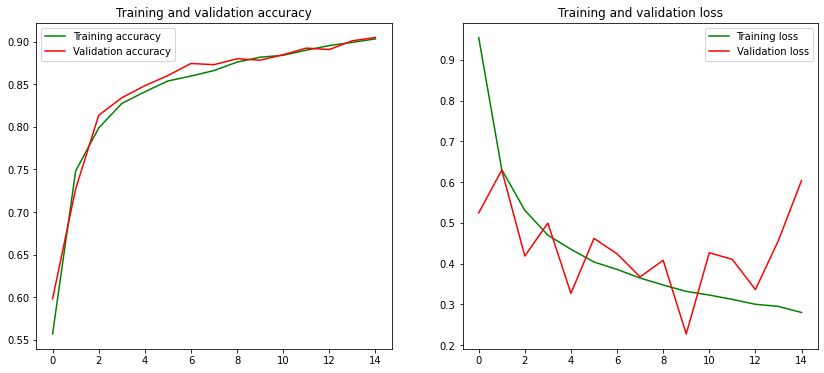

In [ ]:
plot_accuracy_and_loss(history_mobilnet)

In [ ]:
model_mobilnet.save('/content/drive/My Drive/mobilnet(Covid20)')

###Evaluación modelo


In [ ]:
trained_model = model_mobilnet
trained_model.evaluate(test_gen)
filenames = test_gen.filenames
nb_samples = len(filenames)
print(nb_samples)

400/400 [==============================] - 12s 30ms/step
400


In [ ]:
predict = trained_model.predict(test_gen)

In [ ]:
predicted_class_indices=np.argmax(predict,axis=1)

In [ ]:
LABELS = (test_gen.class_indices)
LABELS = dict((v,k) for k,v in LABELS.items())
predictions = [LABELS[k] for k in predicted_class_indices]
true_classes = [LABELS[k] for k in test_gen.classes]

In [ ]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,
                      "Class": true_classes})
results

Filename Predictions      Class
0              covid-19-pneumonia-23-day3.jpg    COVID-19   COVID-19
1    c2bf72e6-cedf-423b-9a25-f60e60f678d6.png      normal     normal
2                radiol.2020201160.fig2b.jpeg    COVID-19   COVID-19
3    c6975c70-af26-41ef-8a43-2f287176b566.png      normal     normal
4    fc6f309f-f4b2-45af-bfee-c756cabdd3c1.png   pneumonia  pneumonia
..                                        ...         ...        ...
395  f961ffa3-2df5-48ce-854a-1440df7f7a6e.png   pneumonia  pneumonia
396          covid-19-pneumonia-58-day-10.jpg    COVID-19   COVID-19
397              radiol.2020201160.fig2b.jpeg    COVID-19   COVID-19
398  32659f33-5e60-4db1-9696-657e54b769c8.png   pneumonia  pneumonia
399  8cf9fffd-08ef-448b-b9ec-1074d9e5691e.png   pneumonia  pneumonia

[400 rows x 3 columns]

In [ ]:
true_classes = np.array(true_classes)
predictions = np.array(predictions)

print(classification_report(true_classes, predictions))

              precision    recall  f1-score   support

    COVID-19       0.92      0.98      0.95       127
      normal       0.88      0.92      0.90       138
   pneumonia       0.93      0.83      0.88       135

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



###Información Hardware

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   44G   22G  67% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G  4.0K  5.8G   1% /dev/shm
tmpfs           6.4G   16K  6.4G   1% /var/colab
/dev/sda1        75G   45G   31G  60% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            69G   49G   21G  71% /content/drive


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10847145844335991464, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6838527666283052300
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15763094607549872551
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14556544091666045576
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

####Resumen hardware


- Proce: 2 Intel(R) Xeon(R) CPU @ 2.30GHz
- GPU: Tesla K80
- RAM Usada: 2.60GB
- GPU RAM Usada: 8.22GB
- Tiempo de entrenamiento: 9121.957 segundos
- Peso modelo: 25MB

drop_duplicates: If you’re for some reason don’t want duplicate entries in your dataframe’s x_col, set this to False, default is True.

In [ ]:
data_covid = data[data['ycol'] == 'COVID-19']
data_normal = data[data['ycol'] == 'normal']
data_pneumonia = data[data['ycol'] == 'pneumonia']

In [ ]:
data_covid.head(6)

id                                               xcol      ycol dataset
28  2  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  COVID-19   cohen
29  2  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  COVID-19   cohen
30  2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  COVID-19   cohen
31  2  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  COVID-19   cohen
32  4                              nejmc2001573_f1a.jpeg  COVID-19   cohen
33  4                              nejmc2001573_f1b.jpeg  COVID-19   cohen

Al dataset de covid le aplicaremos un Over Sampling. Es decir repetiremos sus imagenes con el fin de tener una mayor cantidad de muestras del mismo.

In [ ]:
import pandas as pd
test = data_covid.concat([data_covid['xcol'], data_covid['ycol']])

AttributeError: ignored

In [ ]:
test = rep(data_covid, times=N)

NameError: ignored

In [ ]:
test = data_covid.loc[data_covid.index.repeat(20)].reset_index(drop=True)

In [ ]:
df_merge = pd.merge(data_covid, data_normal, on='xcol', how='outer')

In [ ]:
df_merge = pd.merge(df_merge, data_pneumonia, on='xcol', how='outer')

In [ ]:
df_merge

id_x  ... dataset
0        2  ...     NaN
1        2  ...     NaN
2        2  ...     NaN
3        2  ...     NaN
4        4  ...     NaN
...    ...  ...     ...
15270  NaN  ...    rsna
15271  NaN  ...    rsna
15272  NaN  ...    rsna
15273  NaN  ...    rsna
15274  NaN  ...    rsna

[15275 rows x 10 columns]

In [ ]:
frames = [test, data_normal, data_pneumonia]

result = pd.concat(frames)

In [ ]:
result

id  ... dataset
0                                         2  ...   cohen
1                                         2  ...   cohen
2                                         2  ...   cohen
3                                         2  ...   cohen
4                                         2  ...   cohen
...                                     ...  ...     ...
15270  2c917d3a-95cb-4c11-802c-f83e28cb37bc  ...    rsna
15271  3040d9d7-d895-453f-887c-616c10531960  ...    rsna
15272  c07f52df-d481-434f-84c1-04263926ac40  ...    rsna
15273  c109061a-d815-4cae-8343-9230d8024adf  ...    rsna
15274  c18d1138-ba74-4af5-af21-bdd4d2c96bb5  ...    rsna

[22476 rows x 4 columns]

In [ ]:
# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Training ImagaDataGenerator with Augmentation transf.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, rotation_range=0.2, horizontal_flip=True)
                                   #rotation_range=15, shear_range=10,\
                                   #zoom_range=0.1, fill_mode='nearest', \
                                   #height_shift_range=0.05, width_shift_range=0.1\
                                   


# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'

#valid_gen = valid_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
valid_gen = valid_datagen.flow_from_dataframe(dataframe=result, directory='./photos/All Photos', 
                                              subset='validation',
                                             
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=2020,
                                              target_size=(224, 224), 
                                              batch_size=32,
                                              class_mode='categorical')
# Create a flow from the directory using same seed and 'training' subset.

#train_gen = train_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
train_gen = train_datagen.flow_from_dataframe(dataframe=result, directory='./photos/All Photos', 
                                              subset='training', 
                                              x_col='xcol', y_col='ycol', 
                                      
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=2020,
                                              target_size=(224, 224), 
                                              batch_size=32,
                                              class_mode='categorical')


Found 420 validated image filenames belonging to 3 classes.
Found 1680 validated image filenames belonging to 3 classes.


In [ ]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))
# COMPILE

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_12 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 64)       

In [ ]:
from keras.optimizers import SGD
learningRate = 0.001
lr_decay = 1e-4

sgd = SGD(lr=learningRate, decay=lr_decay, 
         #momentum=0.9, 
          momentum=0.8, 
          nesterov=True)

model.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history6 = model.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks=[metrics_history]
    #,class_weight=[1, 2, 3]
)

Epoch 1/10
210/210 [==============================] - 68s 326ms/step - loss: 1.0385 - accuracy: 0.4387 - val_loss: 1.5856 - val_accuracy: 0.0000e+00
Epoch 2/10
210/210 [==============================] - 70s 335ms/step - loss: 0.9864 - accuracy: 0.5423 - val_loss: 2.1634 - val_accuracy: 0.0000e+00
Epoch 3/10
210/210 [==============================] - 71s 337ms/step - loss: 0.9164 - accuracy: 0.6036 - val_loss: 1.7191 - val_accuracy: 0.0000e+00
Epoch 4/10
210/210 [==============================] - 67s 319ms/step - loss: 0.8679 - accuracy: 0.6339 - val_loss: 1.4464 - val_accuracy: 0.0000e+00
Epoch 5/10
210/210 [==============================] - 66s 314ms/step - loss: 0.8422 - accuracy: 0.6411 - val_loss: 1.5144 - val_accuracy: 0.0000e+00
Epoch 6/10
 33/210 [===>..........................] - ETA: 39s - loss: 0.7921 - accuracy: 0.6591

KeyboardInterrupt: ignored

In [ ]:
from keras.models import Sequential
from keras import regularizers, optimizers
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

weight_decay = 1e-4

model3 = Sequential()
model3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(224, 224, 3),
activation='relu'
))

model3.add(BatchNormalization())
model3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
          activation='relu'))

model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
          activation='relu'))

model3.add(BatchNormalization())
model3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
          activation='relu'))

model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
          activation='relu'))

model3.add(BatchNormalization())
model3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
          activation='relu'))

model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.4))

model3.add(Flatten())
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)    

In [ ]:
opt_rms = keras.optimizers.rmsprop(lr=0.0002,decay=1e-6)

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt_rms,
              metrics=['accuracy'])


history3 = model3.fit_generator(generator=train_gen,
                  epochs=10
                  ,callbacks=[metrics_history]
                  ,validation_data=valid_gen)

Epoch 1/10
210/210 [==============================] - 99s 470ms/step - loss: 6.3090 - accuracy: 0.6482 - val_loss: 0.3050 - val_accuracy: 0.5429
Epoch 2/10
210/210 [==============================] - 94s 447ms/step - loss: 5.5112 - accuracy: 0.6595 - val_loss: 0.0747 - val_accuracy: 0.9095
Epoch 3/10
210/210 [==============================] - 93s 442ms/step - loss: 5.5916 - accuracy: 0.6708 - val_loss: 14.7338 - val_accuracy: 0.5476
Epoch 4/10
210/210 [==============================] - 93s 444ms/step - loss: 5.0028 - accuracy: 0.6762 - val_loss: 18.0427 - val_accuracy: 0.6714
Epoch 5/10
210/210 [==============================] - 92s 440ms/step - loss: 5.1888 - accuracy: 0.6815 - val_loss: 0.1234 - val_accuracy: 0.7095
Epoch 6/10
210/210 [==============================] - 93s 443ms/step - loss: 4.9708 - accuracy: 0.6810 - val_loss: 1.6502 - val_accuracy: 0.6857
Epoch 7/10
210/210 [==============================] - 92s 438ms/step - loss: 4.5461 - accuracy: 0.6970 - val_loss: 36.0553 - val

In [ ]:
trained_model = model3
trained_model.evaluate(valid_gen)

53/53 [==============================] - 22s 408ms/step


[0.08010122925043106, 0.9047619104385376]

In [ ]:
filenames = valid_gen.filenames
nb_samples = len(filenames)
print(nb_samples)

420


In [ ]:
predict = model3.predict_generator(valid_gen,steps = nb_samples)

In [ ]:
predicted_class_indices=np.argmax(predict,axis=1)

In [ ]:
LABELS = (train_gen.class_indices)
LABELS = dict((v,k) for k,v in LABELS.items())
predictions = [LABELS[k] for k in predicted_class_indices]
true_classes = [LABELS[k] for k in valid_gen.classes]

In [ ]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,
                      "Class": true_classes})
results

ValueError: ignored

In [ ]:
true_classes = np.array(true_classes)
predictions = np.array(predictions)

print(classification_report(true_classes, predictions))

ValueError: ignored

In [ ]:
# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Training ImagaDataGenerator with Augmentation transf.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, horizontal_flip=True)
                                   #rotation_range=15, shear_range=10,\
                                   #zoom_range=0.1, fill_mode='nearest', \
                                   #height_shift_range=0.05, width_shift_range=0.1\
                                   


# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'

#valid_gen = valid_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
valid_gen = valid_datagen.flow_from_dataframe(dataframe=result, directory='./photos/All Photos', 
                                              subset='validation',
                                             
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=50,
                                              target_size=(224, 224), 
                                              batch_size=128,
                                              class_mode='categorical')
# Create a flow from the directory using same seed and 'training' subset.

#train_gen = train_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
train_gen = train_datagen.flow_from_dataframe(dataframe=result, directory='./photos/All Photos', 
                                              subset='training', 
                                              x_col='xcol', y_col='ycol', 
                                      
                                              shuffle=True, 
                                              #seed=42, 
                                              seed=50,
                                              target_size=(224, 224), 
                                              batch_size=128,
                                              class_mode='categorical')

Found 420 validated image filenames belonging to 3 classes.
Found 1680 validated image filenames belonging to 3 classes.


In [ ]:
# Detect hardware
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
  tpu = None
  gpus = tf.config.experimental.list_logical_devices("GPU")
    
# Select appropriate distribution strategy for hardware
if tpu:
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu)
  print('Running on TPU ', tpu.master())  
elif len(gpus) > 0:
  strategy = tf.distribute.MirroredStrategy(gpus) # this works for 1 to multiple GPUs
  print('Running on ', len(gpus), ' GPU(s) ')
else:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on CPU')

# How many accelerators do we have ?
print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Running on  1  GPU(s) 
Number of accelerators:  1


In [ ]:
IMAGE_SIZE = [224, 224]

if tpu:
  BATCH_SIZE = 16*strategy.num_replicas_in_sync  # A TPU has 8 cores so this will be 128
else:
  BATCH_SIZE = 32

In [ ]:
with strategy.scope(): # this line is all that is needed to run on TPU (or multi-GPU, ...)

  bnmomemtum=0.9
  def fire(x, squeeze, expand):
    y  = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
    y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
    y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
    y1 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y1)
    y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
    y3 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y3)
    return tf.keras.layers.concatenate([y1, y3])

  def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)

  x = tf.keras.layers.Input(shape=[*IMAGE_SIZE, 3]) # input is 192x192 pixels RGB

  y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=True, activation='relu')(x)
  y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
  y = fire_module(24, 48)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(48, 96)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(64, 128)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(48, 96)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(24, 48)(y)
  y = tf.keras.layers.GlobalAveragePooling2D()(y)
  y = tf.keras.layers.Dense(3, activation='softmax')(y)

  model = tf.keras.Model(x, y)

  model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

  model.summary()

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

In [ ]:
history = model.fit(train_gen, epochs=10,
                    validation_data=valid_gen)

Epoch 1/10
14/14 [==============================] - 65s 5s/step - loss: 0.8775 - accuracy: 0.6381 - val_loss: 2.2744 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 61s 4s/step - loss: 0.7204 - accuracy: 0.7060 - val_loss: 2.9599 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 63s 4s/step - loss: 0.6338 - accuracy: 0.7595 - val_loss: 4.2233 - val_accuracy: 0.0048
Epoch 4/10
14/14 [==============================] - 61s 4s/step - loss: 0.6195 - accuracy: 0.7524 - val_loss: 5.6089 - val_accuracy: 0.0238
Epoch 5/10
14/14 [==============================] - 60s 4s/step - loss: 0.5871 - accuracy: 0.7714 - val_loss: 0.2694 - val_accuracy: 0.8905
Epoch 6/10
14/14 [==============================] - 59s 4s/step - loss: 0.5746 - accuracy: 0.7702 - val_loss: 5.1560 - val_accuracy: 0.1286
Epoch 7/10
14/14 [==============================] - 62s 4s/step - loss: 0.5489 - accuracy: 0.7786 - val_loss: 0.6656 - val_accuracy: 0.7238
Epoch 8/10
1

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


NameError: ignored

## Modelo ResNet

In [ ]:
# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Training ImagaDataGenerator with Augmentation transf.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=0.2, horizontal_flip=True)
                                   #rotation_range=15, shear_range=10,\
                                   #zoom_range=0.1, fill_mode='nearest', \
                                   #height_shift_range=0.05, width_shift_range=0.1\
                                   


# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'

#valid_gen = valid_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
valid_gen = valid_datagen.flow_from_dataframe(dataframe=dataset_os, directory='./photos/All Photos', 
                                              subset='validation',
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True,
                                              color_mode='rgb', 
                                              #seed=42, 
                                              seed=90,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')
# Create a flow from the directory using same seed and 'training' subset.

#train_gen = train_datagen.flow_from_dataframe(dataframe=df2, directory='/content/drive/My Drive/Ingenieria en Sistemas/5to año/Sistemas Inteligentes/Practico Autos/data', 
train_gen = train_datagen.flow_from_dataframe(dataframe=dataset_os, directory='./photos/All Photos', 
                                              subset='training', 
                                              x_col='xcol', y_col='ycol', 
                                              shuffle=True, 
                                              color_mode='rgb',
                                              #seed=42, 
                                              seed=90,
                                              target_size=(224, 224), 
                                              batch_size=64,
                                              class_mode='categorical')

Found 3600 validated image filenames belonging to 3 classes.
Found 14400 validated image filenames belonging to 3 classes.


In [ ]:
base_model = ResNet50(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False,
    pooling='avg')

94658560/94653016 [==============================] - 9s 0us/step


In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
x = base_model.output

dropoutRate = 0.35

x = Dense(2048, activation='relu')(x)
x = Dropout(dropoutRate)(x)
x = Dense(2048, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model_resnet.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
from keras.optimizers import SGD
learningRate = 0.001
lr_decay = 1e-4
sgd = SGD(lr=learningRate, decay=lr_decay, momentum=0.85, nesterov=True)

model_resnet.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_resnet = model_resnet.fit_generator(generator=train_gen,
                              validation_data=valid_gen,
                              epochs=15)

Epoch 1/15
 66/225 [=======>......................] - ETA: 8:43 - loss: 0.7115 - accuracy: 0.7161

KeyboardInterrupt: ignored

In [ ]:
score = model_resnet.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

57/57 [==============================] - 70s 1s/step
Test loss: 0.11854764074087143
Test accuracy: 0.9424999952316284


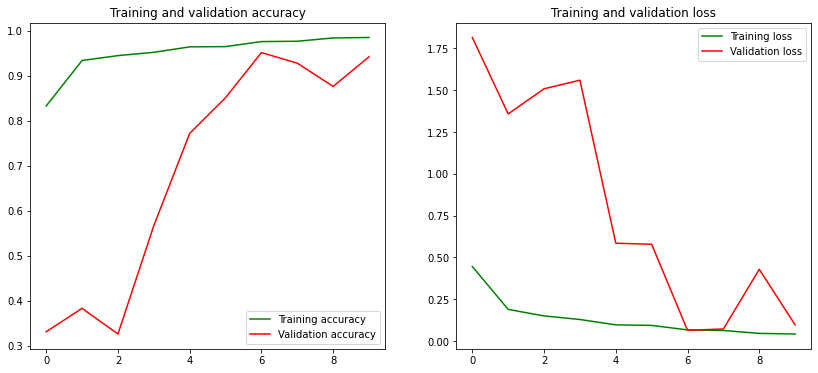

In [ ]:
plot_accuracy_and_loss(history_resnet)

In [ ]:
model_resnet.save('/content/drive/My Drive/Modelos/resnet(ARREGLADO)')

### Evaluacion del modelo

In [ ]:
!wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=18uZSbDjxgHO8pwCht0CSWtxpozjXmEJG" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p' > /tmp/confirm && wget --load-cookies /tmp/cookies.txt --no-check-certificate "https://docs.google.com/uc?export=download&confirm="$(cat /tmp/confirm)"&id=18uZSbDjxgHO8pwCht0CSWtxpozjXmEJG" -O 'model' && rm /tmp/cookies.txt /tmp/confirm

In [ ]:
test_datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

test_gen = test_datagen.flow_from_dataframe(dataframe=dataset_os, directory='./photos/All Photos', \
                                              subset='validation',\
                                              x_col='xcol', y_col='ycol', \
                                              shuffle=False, seed=5, \
                                              color_mode='rgb', \
                                              target_size=(224, 224), \
                                              batch_size=1)


Found 3600 validated image filenames belonging to 3 classes.


In [ ]:
trained_model = load_model('model')
trained_model.evaluate(test_gen)
filenames = test_gen.filenames
nb_samples = len(filenames)
print(nb_samples)

3600/3600 [==============================] - 133s 37ms/step - loss: 0.1153 - accuracy: 0.9642
3600


In [ ]:
predict = trained_model.predict(test_gen)

In [ ]:
predicted_class_indices=np.argmax(predict,axis=1)

In [ ]:
LABELS = (test_gen.class_indices)
LABELS = dict((v,k) for k,v in LABELS.items())
predictions = [LABELS[k] for k in predicted_class_indices]
true_classes = [LABELS[k] for k in test_gen.classes]

In [ ]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,
                      "Class": true_classes})
results

Filename Predictions      Class
0                             COVID-19(75).png    COVID-19   COVID-19
1     d47f354b-d29d-48b9-9c54-07c1e981bef4.png   pneumonia  pneumonia
2                          7-fatal-covid19.jpg    COVID-19   COVID-19
3     63714834-afcf-4c95-adc3-169795ddef89.png      normal     normal
4     cc118833-83a6-4f8f-ba7a-0e69faaaee72.png   pneumonia  pneumonia
...                                        ...         ...        ...
3595  385c5485-7307-464b-a0b5-a4a6612d8bd2.png      normal     normal
3596  8935fd81-a0de-4489-884e-5489faaddacb.png      normal     normal
3597  bf8609b1-a24f-4129-855e-fe3a0862da91.png   pneumonia  pneumonia
3598  b35a3c89-f199-4924-98f0-8d5beea4b41d.png   pneumonia  pneumonia
3599  81d9d146-e9bb-478b-aeed-c2431780030e.png   pneumonia  pneumonia

[3600 rows x 3 columns]

In [ ]:
true_classes = np.array(true_classes)
predictions = np.array(predictions)

print(classification_report(true_classes, predictions))

              precision    recall  f1-score   support

    COVID-19       0.99      0.98      0.99      1217
      normal       0.93      0.98      0.96      1203
   pneumonia       0.97      0.93      0.95      1180

    accuracy                           0.96      3600
   macro avg       0.97      0.96      0.96      3600
weighted avg       0.97      0.96      0.96      3600



### Informacion Hardware

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   44G   22G  68% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G  4.0K  5.8G   1% /dev/shm
tmpfs           6.4G   16K  6.4G   1% /var/colab
/dev/sda1        75G   45G   30G  61% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  7.1G  8.0G  47% /content/drive


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.184
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa itlb_multi

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15525050501909775817, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12364858408327509117
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7177488169776777524
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7098940304941855788
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

#### Resumen Hardware

- Proce: 2 Intel(R) Xeon(R) CPU @ 2.00GHz
- GPU: Tesla P100-PCIE-16GB
- RAM Usada: 3.31GB
- GPU RAM Usada: 15.15GB
- Tiempo de entrenamiento: 5058,237 segundos
- Peso modelo: 224MB

- Curva ROC para definir Trheshold optimo en la prediccion de paciente sanos y no sanos. No hay que decirle a alguien que esta sano si no tenemos la total seguridad.

- Agregar tiempo de predict por imagen. (time(): cuanto tiempo tarda un bloque de codigo) Al menos 100 loops.

# EL VERDADERO TEST

In [ ]:
!wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=1e6G1cXH7_EwAoV8ej-LJoFxWVKOJW3Y8" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p' > /tmp/confirm && wget --load-cookies /tmp/cookies.txt --no-check-certificate "https://docs.google.com/uc?export=download&confirm="$(cat /tmp/confirm)"&id=1e6G1cXH7_EwAoV8ej-LJoFxWVKOJW3Y8" -O 'model' && rm /tmp/cookies.txt /tmp/confirm

--2020-06-18 01:33:05--  https://docs.google.com/uc?export=download&id=1e6G1cXH7_EwAoV8ej-LJoFxWVKOJW3Y8
Resolving docs.google.com (docs.google.com)... 173.194.69.100, 173.194.69.139, 173.194.69.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-06-18 01:33:06 (47.7 MB/s) - written to stdout [3246]

--2020-06-18 01:33:06--  https://docs.google.com/uc?export=download&confirm=7Kz0&id=1e6G1cXH7_EwAoV8ej-LJoFxWVKOJW3Y8
Resolving docs.google.com (docs.google.com)... 173.194.69.113, 173.194.69.139, 173.194.69.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-as-docs.googleusercontent.com/docs/securesc/s21oq26bk3r8g7o47rm6pjel697mtjv3/bhahq88nck

Found 494 validated image filenames belonging to 3 classes.
